In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import os
import scipy as sp
from scipy import sparse
from scipy import stats
from matplotlib import cm
import itertools
from mpl_toolkits.basemap import Basemap, cm
from scipy.stats import spearmanr

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df_cities = pd.read_csv('city_pop.csv', index_col=0)
df_cities

,city,state,population,total_food,latitude,longitude,total_scraped
0,New York,New York,8537673,54191,40.705445,-73.994293,1000
1,Los Angeles,California,3976322,41685,34.061590,-118.321381,1000
2,Chicago,Illinois,2704958,19315,41.905159,-87.677765,1000
3,Houston,Texas,2303482,15197,29.784854,-95.359955,1000
4,Phoenix,Arizona,1615017,11034,33.465086,-112.070160,1000
5,Philadelphia,Pennsylvania,1567872,15438,39.953782,-75.171204,1000
6,San Antonio,Texas,1492510,6273,29.494438,-98.514404,1000
7,San Diego,California,1406630,13666,32.790569,-117.154083,1000
8,Dallas,Texas,1317929,14633,32.839043,-96.800537,1000
9,San Jose,California,1025350,10755,37.316481,-121.885071,1000


In [3]:
df_rest = pd.read_csv('df_restaurants.csv', index_col=0)
df_rest

,id,name,city,state,rating,review_count,cost,latitude,longitude,has_delivery,has_pickup,url
0,poquito-picante-brooklyn-2,Poquito Picante,New York,New York,4.5,40,2,40.685742,-73.981262,True,True,https://www.yelp.com/biz/poquito-picante-brook...
1,nourish-brooklyn-4,Nourish,New York,New York,4.0,65,2,40.677960,-73.968550,True,True,https://www.yelp.com/biz/nourish-brooklyn-4?ad...
2,taste-of-heaven-brooklyn,Taste of Heaven,New York,New York,5.0,19,2,40.717150,-73.940540,False,True,https://www.yelp.com/biz/taste-of-heaven-brook...
3,milk-and-cream-cereal-bar-new-york,Milk & Cream Cereal Bar,New York,New York,4.5,307,2,40.719580,-73.996540,False,False,https://www.yelp.com/biz/milk-and-cream-cereal...
4,the-bao-shoppe-new-york-2,The Bao Shoppe,New York,New York,4.0,99,1,40.714345,-73.990518,False,False,https://www.yelp.com/biz/the-bao-shoppe-new-yo...
5,breakroom-new-york,Breakroom,New York,New York,4.5,1237,1,40.716691,-73.999944,True,True,https://www.yelp.com/biz/breakroom-new-york?ad...
6,bulbap-grill-brooklyn,Bulbap Grill,New York,New York,4.5,73,2,40.724300,-73.950910,False,False,https://www.yelp.com/biz/bulbap-grill-brooklyn...
7,mysttik-masaala-queens-3,Mysttik Masaala,New York,New York,4.5,57,3,40.745787,-73.955732,False,False,https://www.yelp.com/biz/mysttik-masaala-queen...
8,burger-and-lobster-new-york,Burger & Lobster,New York,New York,4.0,3610,2,40.740160,-73.993372,False,False,https://www.yelp.com/biz/burger-and-lobster-ne...
9,char-sue-new-york,Char Sue,New York,New York,4.5,70,2,40.719600,-73.987915,True,True,https://www.yelp.com/biz/char-sue-new-york?adj...


In [4]:
# load pickle here
df_cats = pd.read_pickle('df_categories_sparse.pkl')
df_cats = df_cats.to_sparse()

In [5]:
df_cats_info = pd.read_json('categories.json')
df_cats_info

,alias,country_blacklist,country_whitelist,parents,title
0,3dprinting,NaN,NaN,[localservices],3D Printing
1,abruzzese,NaN,[IT],[italian],Abruzzese
2,absinthebars,NaN,[CZ],[bars],Absinthe Bars
3,acaibowls,"[AR, PL, TR, MX, CL, IT]",NaN,[food],Acai Bowls
4,accessories,NaN,NaN,[fashion],Accessories
5,accountants,NaN,NaN,[professional],Accountants
6,acnetreatment,NaN,NaN,[beautysvc],Acne Treatment
7,active,NaN,NaN,[],Active Life
8,acupuncture,NaN,NaN,[health],Acupuncture
9,addictionmedicine,[JP],NaN,[physicians],Addiction Medicine


In [6]:
val_counts_dict = {t: df_rest.loc[df_cats[t]==1].shape[0] for t in df_cats.columns}

In [7]:
pd.DataFrame.from_dict([val_counts_dict]).T.sort_values(0, ascending=False)

,0
sandwiches,64723
mexican,62550
hotdogs,58303
tradamerican,52656
pizza,50188
burgers,48277
breakfast_brunch,39025
newamerican,31026
coffee,29987
italian,28380


In [8]:
df_cats.loc[(df_cats['sandwiches']==1) & (df_cats['hotdogs']==1)].shape

(13856, 684)

In [9]:
df_hist = pd.DataFrame()
df_hist['hotdog_and_sandwich'] = (df_rest.loc[(df_cats['sandwiches']==1) & 
                                              ((df_cats['hotdogs']==1) | 
                                               (df_cats['hotdogs']==1)), 'rating']
                                  .value_counts()
                                  .sort_index())

df_hist['hotdog_only'] = (df_rest.loc[(df_cats['sandwiches']==0) & 
                                      ((df_cats['hotdogs']==1) | 
                                       (df_cats['hotdogs']==1)), 'rating']
                          .value_counts()
                          .sort_index())

df_hist['sandwich_only'] = (df_rest.loc[(df_cats['sandwiches']==1) & 
                                        ((df_cats['hotdogs']==0) & 
                                         (df_cats['hotdogs']==0)), 'rating']
                            .value_counts()
                            .sort_index())

df_hist['field'] = (df_rest.loc[(df_cats['sandwiches']==0) & 
                                ((df_cats['hotdogs']==0) & 
                                 (df_cats['hotdogs']==0)), 'rating']
                    .value_counts()
                    .sort_index())
df_hist

,hotdog_and_sandwich,hotdog_only,sandwich_only,field
1.0,939,2177,316,7835
1.5,517,3346,280,3949
2.0,1384,5888,928,11775
2.5,1752,7180,2348,23704
3.0,2406,7768,5182,54017
3.5,2434,7047,9626,96859
4.0,2506,7056,16488,158139
4.5,953,2926,12473,101308
5.0,965,1057,3224,55185


In [10]:
for col in df_hist.columns:
    df_hist[col] = df_hist[col]/df_hist[col].sum()

In [11]:
df_hist['rating'] = df_hist.index

In [12]:
df_hist = pd.melt(df_hist, id_vars='rating')

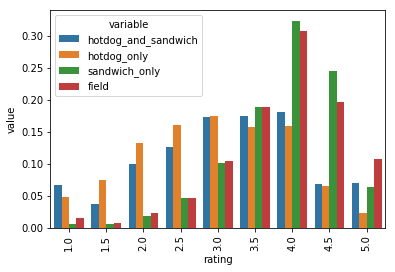

In [13]:
sns.barplot(y='value', x='rating', data=df_hist, hue='variable')
plt.xticks(rotation=90)
plt.show()

In [14]:
df_rest.loc[(df_rest.loc[(df_cats['icecream']==1) & 
                         ((df_cats['hotdogs']==1) | 
                          (df_cats['hotdogs']==1))].index), 
            'icedog'] = 'hotdog_and_icecream'

In [15]:
df_rest = df_rest.reset_index(drop=True)

In [16]:
df_rest.loc[(df_cats['icecream']==0) & 
                         ((df_cats['hotdog']==0) & 
                          (df_cats['hotdogs']==0))]

,id,name,city,state,rating,review_count,cost,latitude,longitude,has_delivery,has_pickup,url,icedog
0,poquito-picante-brooklyn-2,Poquito Picante,New York,New York,4.5,40,2,40.685742,-73.981262,True,True,https://www.yelp.com/biz/poquito-picante-brook...,NaN
1,nourish-brooklyn-4,Nourish,New York,New York,4.0,65,2,40.677960,-73.968550,True,True,https://www.yelp.com/biz/nourish-brooklyn-4?ad...,NaN
2,taste-of-heaven-brooklyn,Taste of Heaven,New York,New York,5.0,19,2,40.717150,-73.940540,False,True,https://www.yelp.com/biz/taste-of-heaven-brook...,NaN
4,the-bao-shoppe-new-york-2,The Bao Shoppe,New York,New York,4.0,99,1,40.714345,-73.990518,False,False,https://www.yelp.com/biz/the-bao-shoppe-new-yo...,NaN
5,breakroom-new-york,Breakroom,New York,New York,4.5,1237,1,40.716691,-73.999944,True,True,https://www.yelp.com/biz/breakroom-new-york?ad...,NaN
6,bulbap-grill-brooklyn,Bulbap Grill,New York,New York,4.5,73,2,40.724300,-73.950910,False,False,https://www.yelp.com/biz/bulbap-grill-brooklyn...,NaN
7,mysttik-masaala-queens-3,Mysttik Masaala,New York,New York,4.5,57,3,40.745787,-73.955732,False,False,https://www.yelp.com/biz/mysttik-masaala-queen...,NaN
8,burger-and-lobster-new-york,Burger & Lobster,New York,New York,4.0,3610,2,40.740160,-73.993372,False,False,https://www.yelp.com/biz/burger-and-lobster-ne...,NaN
9,char-sue-new-york,Char Sue,New York,New York,4.5,70,2,40.719600,-73.987915,True,True,https://www.yelp.com/biz/char-sue-new-york?adj...,NaN
11,honeygrow-brooklyn,honeygrow,New York,New York,4.0,53,2,40.692500,-73.991410,False,False,https://www.yelp.com/biz/honeygrow-brooklyn?ad...,NaN


In [17]:
df_rest.loc[(df_cats['icecream']==1) & 
                         ((df_cats['hotdog']==0) & 
                          (df_cats['hotdogs']==0))]

,id,name,city,state,rating,review_count,cost,latitude,longitude,has_delivery,has_pickup,url,icedog
3,milk-and-cream-cereal-bar-new-york,Milk & Cream Cereal Bar,New York,New York,4.5,307,2,40.719580,-73.996540,False,False,https://www.yelp.com/biz/milk-and-cream-cereal...,NaN
75,by-chloe-new-york-11,by CHLOE,New York,New York,4.0,1275,2,40.729242,-74.000913,False,False,https://www.yelp.com/biz/by-chloe-new-york-11?...,NaN
128,by-chloe-soho-new-york,by CHLOE - Soho,New York,New York,4.0,119,2,40.722770,-73.997200,False,False,https://www.yelp.com/biz/by-chloe-soho-new-yor...,NaN
228,shake-shack-new-york-11,Shake Shack,New York,New York,4.0,802,2,40.715317,-74.014809,False,False,https://www.yelp.com/biz/shake-shack-new-york-...,NaN
470,shake-shack-brooklyn-12,Shake Shack,New York,New York,4.0,260,2,40.703015,-73.993954,False,False,https://www.yelp.com/biz/shake-shack-brooklyn-...,NaN
547,shake-shack-brooklyn,Shake Shack,New York,New York,4.0,733,2,40.692088,-73.988869,False,False,https://www.yelp.com/biz/shake-shack-brooklyn?...,NaN
697,mister-dips-brooklyn,Mister Dips,New York,New York,4.0,51,2,40.722280,-73.957121,False,False,https://www.yelp.com/biz/mister-dips-brooklyn?...,NaN
824,brooklyn-farmacy-and-soda-fountain-brooklyn,Brooklyn Farmacy & Soda Fountain,New York,New York,4.0,556,2,40.683980,-73.999230,False,False,https://www.yelp.com/biz/brooklyn-farmacy-and-...,NaN
975,shake-shack-new-york-34,Shake Shack,New York,New York,4.0,154,2,40.751171,-73.988136,False,False,https://www.yelp.com/biz/shake-shack-new-york-...,NaN
1360,zeros-unlikely-snacks-los-angeles,Zero's Unlikely Snacks,Los Angeles,California,5.0,12,1,34.100755,-118.273439,False,False,https://www.yelp.com/biz/zeros-unlikely-snacks...,NaN


In [18]:
df_rest.loc[(df_rest.loc[(df_cats['icecream']==1) & 
                         ((df_cats['hotdog']==1) | 
                          (df_cats['hotdogs']==1))].index), 
            'icedog'] = 'hotdog_and_icecream'

df_rest.loc[(df_rest.loc[(df_cats['icecream']==0) & 
                         ((df_cats['hotdog']==1) | 
                          (df_cats['hotdogs']==1))].index), 
            'icedog'] = 'hotdog_only'

df_rest.loc[(df_rest.loc[(df_cats['icecream']==1) & 
                         ((df_cats['hotdog']==0) & 
                          (df_cats['hotdogs']==0))].index), 
            'icedog'] = 'icecream_only'

df_rest.loc[(df_rest.loc[(df_cats['icecream']==0) & 
                         ((df_cats['hotdog']==0) & 
                          (df_cats['hotdogs']==0))].index), 
            'icedog'] = 'field'

In [19]:
df_rest['icedog'].value_counts()

field                  544910
hotdog_only             61859
icecream_only           13349
hotdog_and_icecream      1833
Name: icedog, dtype: int64

In [20]:
df_rest['icedog'] = pd.Categorical(df_rest['icedog'])

In [21]:
results = pd.DataFrame()
for x, y in itertools.product(df_rest['icedog'].cat.codes.unique(), df_rest['icedog'].cat.codes.unique()):
    temp = pd.DataFrame()
    temp['x'] = [x]
    temp['y'] = y
    
    a,b = stats.mannwhitneyu(df_rest.loc[df_rest['icedog'].cat.codes==x,'rating'], df_rest.loc[df_rest['icedog'].cat.codes==y,'rating'])
    temp['U'] = a
    temp['pval'] = b
    
    results = results.append(temp, ignore_index=True)
results    
    

,x,y,U,pval
0,0,0,1.484635e+11,5.000000e-01
1,0,3,3.305848e+09,3.078902e-76
2,0,2,9.592704e+09,0.000000e+00
3,0,1,3.375633e+08,1.048778e-133
4,3,0,3.305848e+09,3.078902e-76
5,3,3,8.909790e+07,4.999997e-01
6,3,2,2.181554e+08,0.000000e+00
7,3,1,7.555414e+06,3.332300e-162
8,2,0,9.592704e+09,0.000000e+00
9,2,3,2.181554e+08,0.000000e+00


In [22]:
df_rest['icedog'].cat.categories

Index(['field', 'hotdog_and_icecream', 'hotdog_only', 'icecream_only'], dtype='object')

In [23]:
results.loc[results['pval']<0.05].sort_values('pval')

,x,y,U,pval
2,0,2,9.592704e+09,0.000000e+00
6,3,2,2.181554e+08,0.000000e+00
8,2,0,9.592704e+09,0.000000e+00
9,2,3,2.181554e+08,0.000000e+00
7,3,1,7.555414e+06,3.332300e-162
13,1,3,7.555414e+06,3.332300e-162
3,0,1,3.375633e+08,1.048778e-133
12,1,0,3.375633e+08,1.048778e-133
1,0,3,3.305848e+09,3.078902e-76
4,3,0,3.305848e+09,3.078902e-76


In [24]:
df_rest['icedog'].cat.categories

Index(['field', 'hotdog_and_icecream', 'hotdog_only', 'icecream_only'], dtype='object')

In [25]:
df_hist = pd.DataFrame()
df_hist['hotdog_and_icecream'] = (df_rest.loc[(df_cats['icecream']==1) & 
                                              ((df_cats['hotdogs']==1) | 
                                               (df_cats['hotdogs']==1)), 'rating']
                                  .value_counts()
                                  .sort_index())

df_hist['hotdog_only'] = (df_rest.loc[(df_cats['icecream']==0) & 
                                      ((df_cats['hotdogs']==1) | 
                                       (df_cats['hotdogs']==1)), 'rating']
                          .value_counts()
                          .sort_index())

df_hist['icecream_only'] = (df_rest.loc[(df_cats['icecream']==1) & 
                                        ((df_cats['hotdogs']==0) & 
                                         (df_cats['hotdogs']==0)), 'rating']
                            .value_counts()
                            .sort_index())

df_hist['field'] = (df_rest.loc[(df_cats['icecream']==0) & 
                                ((df_cats['hotdogs']==0) & 
                                 (df_cats['hotdogs']==0)), 'rating']
                    .value_counts()
                    .sort_index())
df_hist

,hotdog_and_icecream,hotdog_only,icecream_only,field
1.0,57,3059,248,7903
1.5,47,3816,137,4092
2.0,127,7145,385,12318
2.5,204,8728,681,25371
3.0,267,9907,1201,57998
3.5,285,9196,1947,104538
4.0,269,9293,3618,171009
4.5,91,3788,3638,110143
5.0,39,1983,1941,56468


In [26]:
for col in df_hist.columns:
    df_hist[col] = df_hist[col]/df_hist[col].sum()

In [27]:
df_hist['rating'] = df_hist.index

In [28]:
df_hist = pd.melt(df_hist, id_vars='rating')

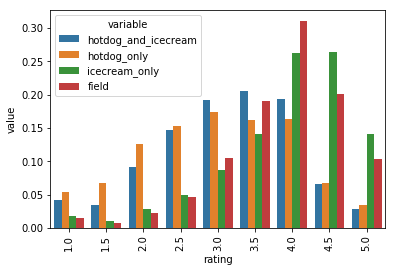

In [29]:
sns.barplot(y='value', x='rating', data=df_hist, hue='variable')
plt.xticks(rotation=90)
plt.show()

In [30]:
df_cities['total_food'].describe()

count      761.000000
mean      2834.293035
std       4182.121709
min         87.000000
25%        632.000000
50%       1389.000000
75%       3696.000000
max      54191.000000
Name: total_food, dtype: float64

In [31]:
df_rest.shape

(621951, 13)

In [32]:
df_chipotle = df_rest.loc[df_rest['name'].str.lower().str.contains('chipotle')]

In [33]:
df_chipotle['idx'] = df_chipotle.index.values
df_chipotle

C:\Users\hello\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,name,city,state,rating,review_count,cost,latitude,longitude,has_delivery,has_pickup,url,icedog,idx
1341,chipotle-mexican-grill-los-angeles-55,Chipotle Mexican Grill,Los Angeles,California,3.5,11,1,34.041418,-118.258382,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,1341
3638,chipotle-mexican-grill-houston-35,Chipotle Mexican Grill,Houston,Texas,4.0,68,1,29.747211,-95.410361,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,3638
3731,chipotle-mexican-grill-houston-17,Chipotle Mexican Grill,Houston,Texas,3.5,73,1,29.709650,-95.401235,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,3731
4426,chipotle-mexican-grill-phoenix-10,Chipotle Mexican Grill,Phoenix,Arizona,3.5,63,1,33.447948,-112.074617,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,4426
4656,chipotle-mexican-grill-phoenix-25,Chipotle Mexican Grill,Phoenix,Arizona,4.5,15,1,33.509435,-112.072213,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,4656
4952,chipotle-mexican-grill-phoenix-9,Chipotle Mexican Grill,Phoenix,Arizona,3.0,123,1,33.509365,-112.046390,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,4952
6441,chipotle-mexican-grill-san-antonio-12,Chipotle Mexican Grill,San Antonio,Texas,3.5,40,1,29.519733,-98.500963,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,6441
6499,chipotle-mexican-grill-san-antonio-4,Chipotle Mexican Grill,San Antonio,Texas,4.0,41,1,29.498071,-98.480085,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,6499
6500,chipotle-mexican-grill-san-antonio-4,Chipotle Mexican Grill,San Antonio,Texas,4.0,41,1,29.498071,-98.480085,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,6500
8544,chipotle-mexican-grill-dallas-5,Chipotle Mexican Grill,Dallas,Texas,4.0,64,1,32.857560,-96.769520,False,False,https://www.yelp.com/biz/chipotle-mexican-gril...,hotdog_only,8544


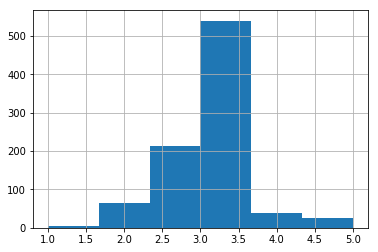

In [34]:
(df_chipotle
 .loc[df_chipotle['state']
      .isin(['California', 'Florida', 
             'Texas', 'Illinois']), 'rating']).hist(bins=6)

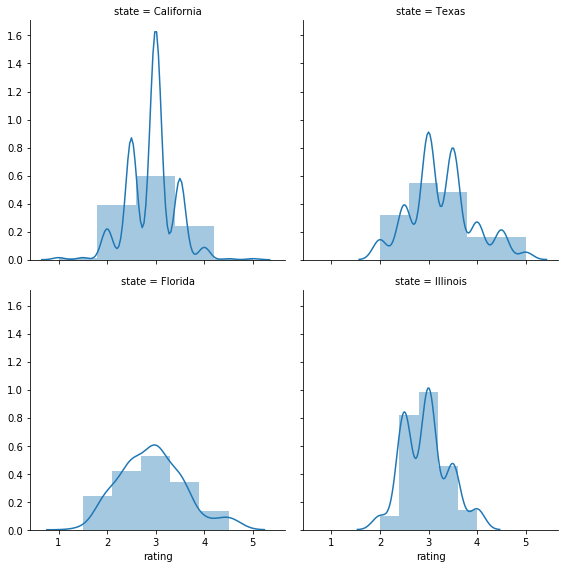

In [35]:
df_plt = df_chipotle.loc[df_chipotle['state']
                         .isin(['California', 'Florida', 
                                'Texas', 'Illinois'])]
g = sns.FacetGrid(df_plt, col='state', col_wrap=2, size=4)
g.map(sns.distplot, 'rating', kde=True, bins=5)
plt.show()

In [36]:
df_plt[['idx', 'state', 'rating']].to_csv('df_chipotle.csv')

In [37]:
df_plt.loc[df_plt['has_delivery']==True].shape[0]/df_plt.shape[0]

0.030508474576271188

In [98]:
shitty_food = ["Burger King", 'Cracker Barrel Old Country Store', "Wendy's", 
               'IHOP', "Zaxby's Chicken Fingers & Buffalo Wings", 
               'Chipotle Mexican Grill', 'Taco Bell', "Sonny's BBQ",
               "Buffalo Wild Wings", "Hooters"]

df_rest.loc[(df_rest['state']
             .isin(['California', 'Florida', 
                    'Texas', 'Illinois'])) & 
            (df_rest['name'].isin(shitty_food))].to_csv('shitty_food.csv')

In [104]:
data = df_rest.loc[df_rest['name'] == 'Taco Bell']

In [105]:
df_plt = data.groupby(['city', 'state'], as_index=False).mean()
df_plt['citystate'] = df_plt['city'].str.lower() + ', ' + df_plt['state'].str.lower()

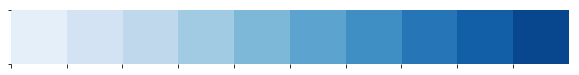

In [106]:
palette = sns.color_palette("Blues", 10)
sns.palplot(palette)
sns.despine(bottom=True, left=True)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\hello\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


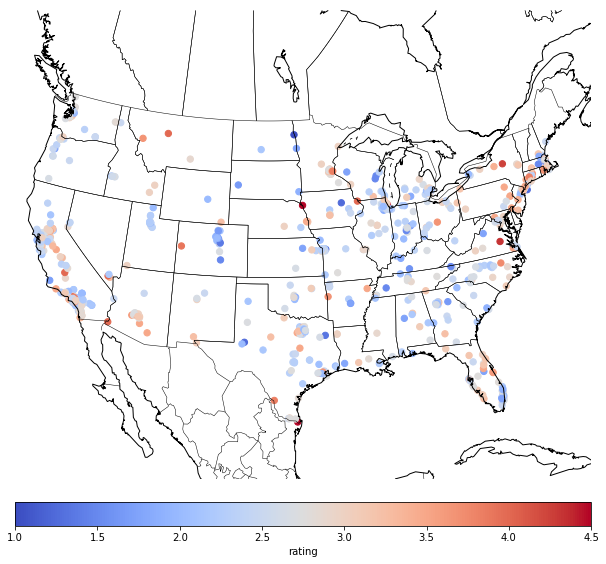

In [107]:
latcorners = df_plt['latitude']
loncorners = df_plt['longitude']

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='stere',lon_0=-100,lat_0=40,lat_ts=40,
            llcrnrlat=20,urcrnrlat=51,
            llcrnrlon=-120,urcrnrlon=-60,
            rsphere=6371200.,resolution='l',area_thresh=10000)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

f = m.scatter(df_plt['longitude'].values, df_plt['latitude'].values, 40, 
          marker='o',c=df_plt['rating'].values, cmap='coolwarm', latlon=True)

cbar = m.colorbar(f,location='bottom',pad="5%")
cbar.set_label('rating')
sns.despine(left=True, bottom=True)
plt.show()

In [128]:
df_cats.sum().sort_values(ascending=False)

sandwiches              64723
mexican                 62550
hotdogs                 58303
tradamerican            52656
pizza                   50188
burgers                 48277
breakfast_brunch        39025
newamerican             31026
coffee                  29987
italian                 28380
seafood                 26280
chinese                 26267
grocery                 22727
salad                   22291
bakeries                20171
bars                    19994
foodtrucks              19650
chicken_wings           17667
japanese                16973
delis                   16854
sushi                   16021
catering                15751
desserts                15228
icecream                15182
bbq                     15170
convenience             14308
cafes                   14229
asianfusion             12304
mediterranean           11744
sportsbars              11618
                        ...  
mailboxcenters              1
vacation_rentals            1
musicprodu

In [129]:
df_rest.loc[df_cats['hotdogs']==1, 'is_hotdogs'] = 1
df_rest['is_hotdogs'] = df_rest['is_hotdogs'].fillna(0)

In [130]:
data = df_rest.groupby(['city', 'state'], as_index=False).mean()
df_plt = data.groupby(['city', 'state'], as_index=False).mean()
df_plt['citystate'] = df_plt['city'].str.lower() + ', ' + df_plt['state'].str.lower()

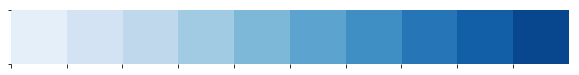

In [131]:
palette = sns.color_palette("Blues", 10)
sns.palplot(palette)
sns.despine(bottom=True, left=True)
plt.show()

C:\Users\hello\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\hello\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


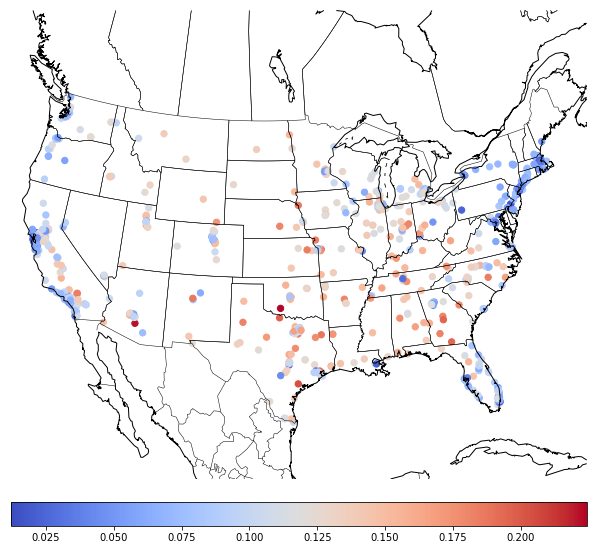

In [133]:
latcorners = df_plt['latitude']
loncorners = df_plt['longitude']

fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='stere',lon_0=-100,lat_0=40,lat_ts=40,
            llcrnrlat=20,urcrnrlat=51,
            llcrnrlon=-120,urcrnrlon=-60,
            rsphere=6371200.,resolution='l',area_thresh=10000)

m.drawcoastlines()
m.drawstates()
m.drawcountries()

f = m.scatter(df_plt['longitude'].values, df_plt['latitude'].values, 40, 
          marker='o',c=df_plt['is_hotdogs'].values, cmap='coolwarm', latlon=True)

cbar = m.colorbar(f,location='bottom',pad="5%")
# cbar.set_label('rating')
sns.despine(left=True, bottom=True)
plt.show()

In [138]:
df_plt = df_plt.merge(df_cities[['city', 'state', 'population']], on=['city', 'state'])

In [160]:
spearmanr(df_plt['population'], df_plt['is_mex'])

SpearmanrResult(correlation=0.15158203120957076, pvalue=2.681090091023933e-05)

In [159]:
spearmanr(np.log(df_plt['population']), df_plt['is_mex'])

SpearmanrResult(correlation=0.15158203120957076, pvalue=2.681090091023933e-05)

In [161]:
spearmanr(df_plt['population'], df_plt['is_hotdogs'])

SpearmanrResult(correlation=-0.15038384078632075, pvalue=3.1078814021019139e-05)

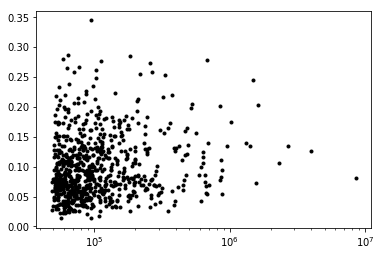

In [157]:
plt.plot(df_plt['population'], df_plt['is_mex'], 'k.')
ax = plt.gca()
ax.set_xscale('log')

In [155]:
g = sns.regplot('population', 'is_mex', df_plt)
ax = plt.gca()
ax.set_xscale('log')
plt.show()

ValueError: posx and posy should be finite values

In [ ]:

# data from http://water.weather.gov/precip/



# create figure and axes instances

# create polar stereographic Basemap instance.

# draw coastlines, state and country boundaries, edge of map.

# draw parallels.
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="5%")
cbar.set_label('mm')
# add title
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
plt.show()